<p align="center">
  <img width="300" height="290" src="https://i.imgur.com/mu6ZuGT.jpg">
</p>

<h1><b>TC4033</b></h1>
<h1><b>Visión computacional para imágenes y video</b></h1>
<h3><b>9.2 Segmentación de imágenes</b></h3>
<h3><b>9.4 Algoritmo de segmentación de Otsu,</b></h3>
<h3><b>Docentes:</b> Dr. Gilberto Ochoa Ruiz, Mtra. María Guadalupe Marcos Abularach</h3>

<h2><b>Equipo 30:</b></h2>

- Julio Baltazar Colín: A01794476
- Helmy Andrea Moreno Navarro: A01793918
- Maricel Parra Osorio - A01793932
- Yeison Fernando Villamil Franco: A01793803


# **6. Otsu Thresholding**

## **Table of Content**s
[Introduction](#intro)

1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)
4. [Challenge](#challenge)
  - Limitaciones de single thresholding contra el algoritmo de Otsu


#**Introducción**


En el camp del procesamiento de imágenes, uno de los desafíos cruciales es la ***segmentación***: la capacidad de separar objetos de interés del fondo. Aquí, la selección de umbrales es como una herramienta esencial. Dos enfoques principales son el umbral simple y el algoritmo de Otsu. Mientras que el umbral simple requiere la intervención manual para fijar un valor, Otsu ofrece una solución automatizada mediante un proceso de optimización. Esta distinción esencial entre métodos manuales y automáticos revela su impacto en la eficiencia y precisión de la segmentación.

El propósito de esta sesión es adentrarnos en la implementación del algoritmo de Otsu, explorando tanto sus puntos fuertes como sus limitaciones.

## **Importing Libraries** <a class="anchor" id="libraries" ></a>

In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np

In [2]:
import cv2 as cv2

In [3]:
from io import BytesIO
import requests

def imagen_desde_url(url):
  # Obtener la imagen desde la URL
  response = requests.get(url)
  img_data = BytesIO(response.content)

  # Decodificar los datos de la imagen y convertir a matriz de imagen
  image = cv2.imdecode(np.frombuffer(img_data.read(), np.uint8), 1)

  # Convertir la imagen de BGR a RGB (ya que OpenCV carga imágenes en formato BGR por defecto)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

  return image

## **Single Thresholding** <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

<ipython-input-4-ce81723eaa7b>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


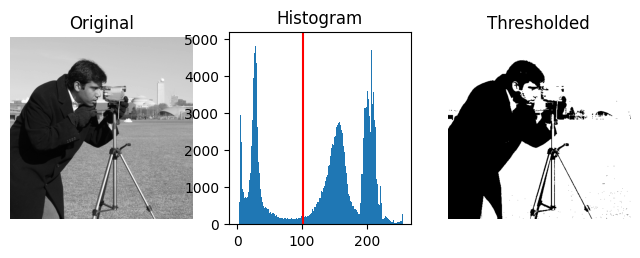

In [4]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




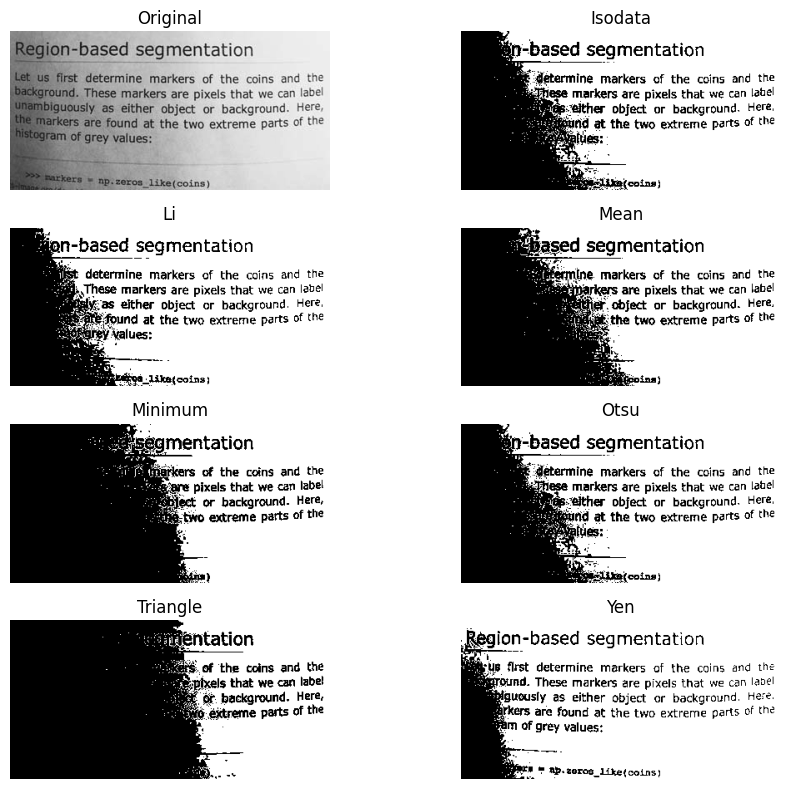

In [5]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

## **Multi Thresholding** <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

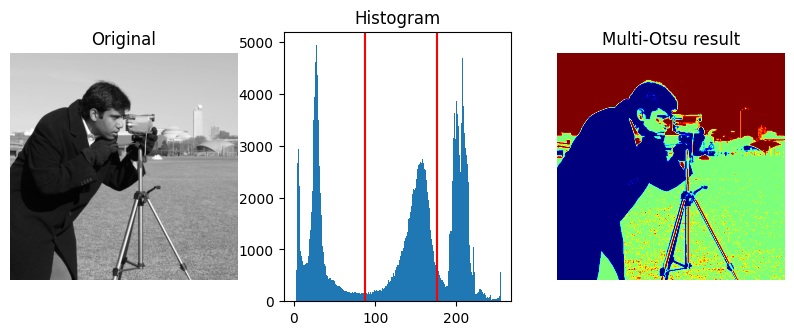

In [6]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

#**4. Challenge**

## **1. Experimenta con diferentes imagenes ademas de las provistas en en Colab, identifca imagenes con diferentes backgrounds y estilos, cuáles son las limitaciones de single thresholding contra el algoritmo de Otsu?**

In [7]:
def otsu_vs_single(image_dict, xsz=15, ysz=7):

    # Crear una figura y un conjunto de subplots
    fig, axes = plt.subplots(len(image_dict), 6, figsize=(xsz, ysz))

    plt.subplots_adjust( wspace=0.01, hspace=0.3)

    # Para cada imagen del diccionario usando parejas
    for (title, image), ax in zip(image_dict.items(), axes):
        # Mostrar la imagen original
        ax[0].imshow(image, cmap='gray')
        ax[0].set_title(title)
        ax[0].axis('off')

        # Convertir a escala de grises
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ax[1].imshow(img_gray, cmap='gray')
        ax[1].set_title('Escala de grises')
        ax[1].axis('off')

        # Calcular el umbral de Otsu
        threshold = threshold_otsu(img_gray)
        img_binary = img_gray > threshold

        # Mostrar el histograma
        ax[2].hist(img_gray.ravel(), bins=256)
        ax[2].set_title('Histograma Grises')
        ax[2].axvline(threshold, color='r')

        # Hacer el plot con umbral simple
        ax[3].imshow(img_binary, cmap='gray')
        ax[3].set_title('Resultado Umbral Simple')
        ax[3].axis('off')

        #calcular los multithesholds
        thresholds = threshold_multiotsu(img_gray)

        #obtener las regiones
        regiones = np.digitize(img_gray, bins=thresholds)

        #mostrar el histograma
        ax[4].hist(image.ravel(), bins=255)
        ax[4].set_title('Histograma multirregion')
        for thresh in thresholds:
            ax[4].axvline(thresh, color='r')

        #mostra el resultado
        # Plotting the Multi Otsu result.
        ax[5].imshow(regiones, cmap='magma')
        ax[5].set_title('Resultado Multi-Otsu')
        ax[5].axis('off')

    plt.show()


In [8]:
image_1 = imagen_desde_url("https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_9/artesania.jpg?raw=true")
image_2 = imagen_desde_url("https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_2/alebrije.jpg?raw=true")
image_3 = imagen_desde_url("https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_2/kitty-baseline.jpg?raw=true")
image_4 = imagen_desde_url("https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_6/Cebra.jpg?raw=true")
image_5 = imagen_desde_url("https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_4/00038_sat.jpg?raw=true")

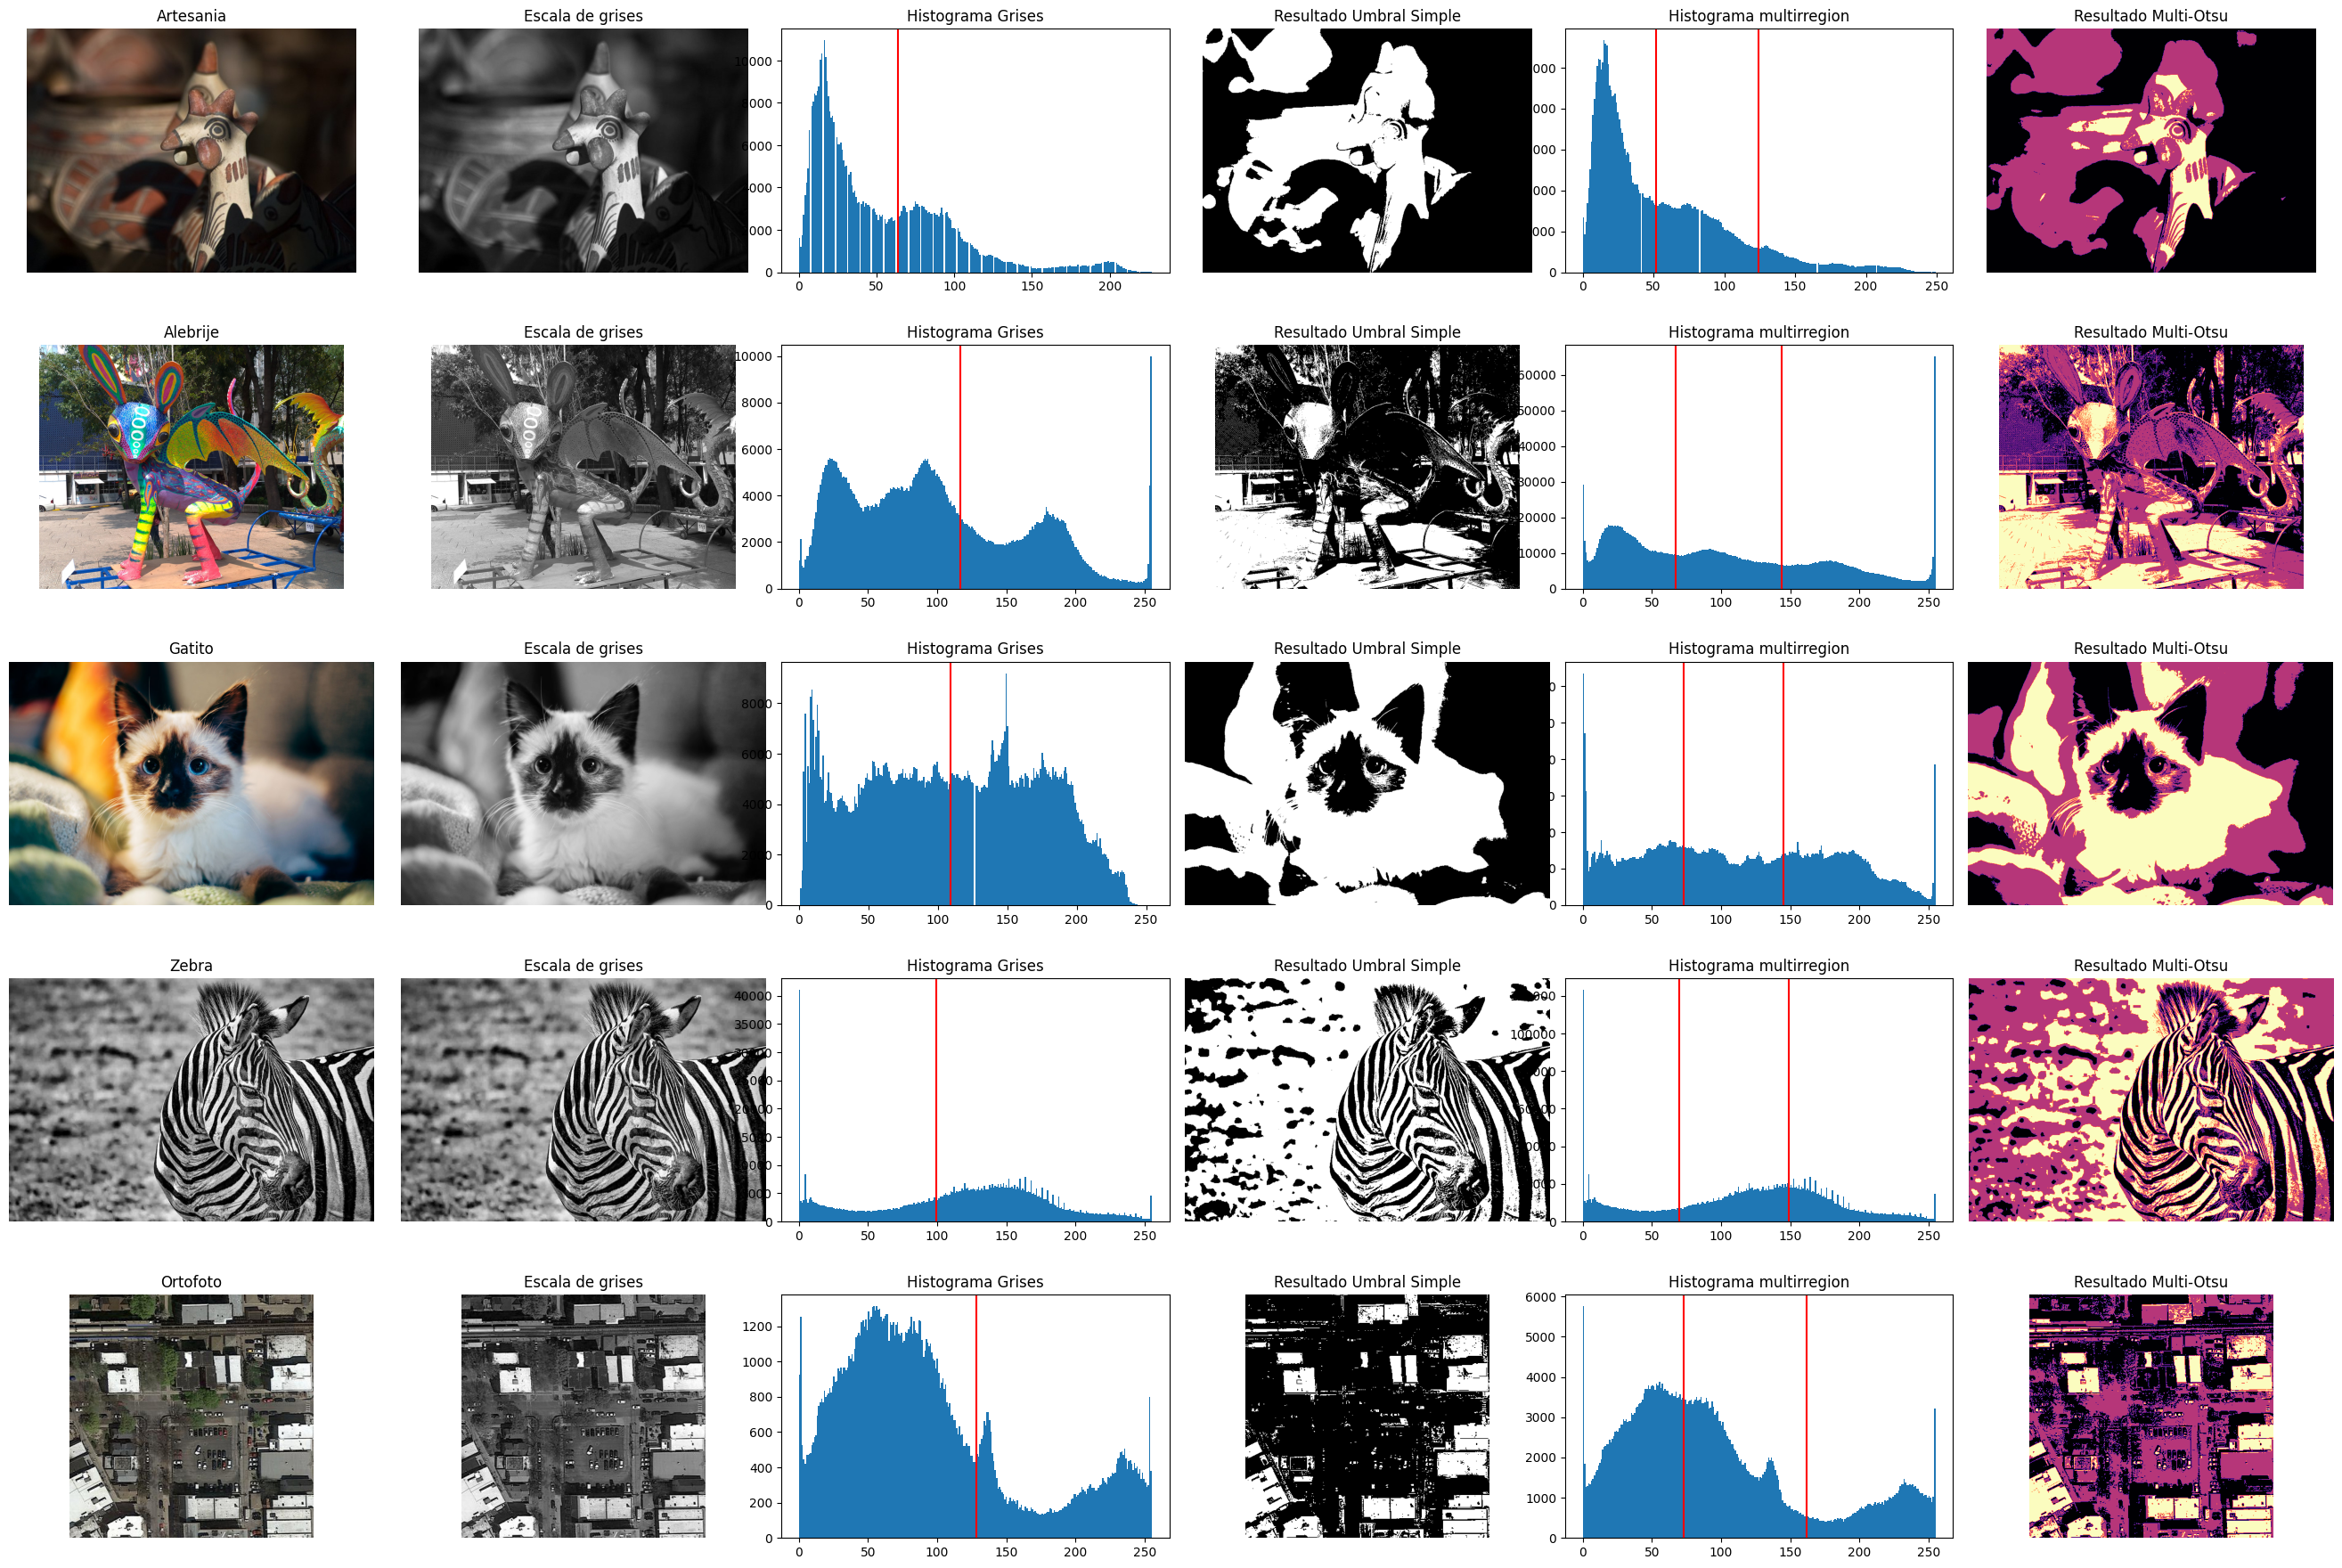

In [9]:
image_dict = { 'Artesania': image_1
              ,'Alebrije': image_2
              ,'Gatito': image_3
              ,'Zebra': image_4
              ,'Ortofoto': image_5
              }

otsu_vs_single(image_dict,34,22)

## **1.1 ¿Cuáles son las limitaciones de single thresholding contra el algoritmo de Otsu?**


El método de umbral simple implica la selección de un umbral estático para separar los píxeles de una imagen en dos clases distintas: primer plano y fondo. Sin embargo, esta técnica presenta diversas limitaciones:

* Sensibilidad a la iluminación y al ruido: Debido a su naturaleza estática, el umbral único puede ser susceptible a variaciones en la iluminación de la imagen y a la presencia de ruido. En escenarios con iluminación variable o ruido perceptible, el umbral fijo puede resultar ineficaz, como se evidencia en las imágenes del alebrije y la Ortofoto, donde se pierden detalles finos.

* Requiere análisis previo: La selección del umbral adecuado en el umbral simple demanda un conocimiento previo del contenido de la imagen y del rango de intensidades de los píxeles. A menudo, este análisis previo puede ser complejo, ya que el algoritmo tiende a dividir la distribución de intensidades a la mitad, lo cual puede no ser óptimo en todas las situaciones.

* Falta de adaptabilidad a la distribución de intensidades: El método de umbral simple no tiene en cuenta la distribución de intensidades de los píxeles en la imagen. Por lo tanto, puede no ser adecuado para imágenes con una distribución no uniforme de intensidades. Aunque el resultado puede ser satisfactorio en algunos casos, como en la imagen de la cebra, en otras situaciones, como la artesanía, se pueden perder detalles importantes.

Por otro lado, el algoritmo de Otsu aborda estas limitaciones y proporciona diversas ventajas:

* Automatización: El algoritmo de Otsu no requiere intervención manual para la selección del umbral. Al calcular automáticamente el umbral óptimo, se vuelve más robusto y aplicable a una variedad más amplia de imágenes, incluso en situaciones donde el preprocesamiento de imágenes es limitado o en tiempo real.

* Mayor adaptabilidad: El algoritmo de Otsu es capaz de adaptarse dinámicamente a la distribución de intensidades de las imágenes. Esto lo hace más efectivo en una variedad de condiciones de iluminación y contenido de imagen. Como resultado, se observa una mejora significativa en la preservación de los detalles y una menor sensibilidad a las variaciones de iluminación, como se evidencia en los resultados de las diferentes imágenes del ejemplo.

* Mejor segmentación: Al considerar la distribución de intensidades de los píxeles en la imagen, el algoritmo de Otsu tiende a producir segmentaciones más precisas y consistentes en comparación con el método de umbral simple. Esto se traduce en una mejor separación entre el primer plano y el fondo, preservando los detalles y mejorando la calidad visual de la imagen segmentada.

**Referencias**:
[1]Articulo: Image Binarization using Otsu Thresholding Algorithm.
https://www.researchgate.net/publication/277076039_Image_Binarization_using_Otsu_Thresholding_Algorithm

[2]Articulo: K. Saddami, K. Munadi, Y. Away, y F. Arnia, «Improvement of binarization performance using local otsu thresholding», International Journal Of Electrical And Computer Engineering, vol. 9, n.o 1, p. 264, feb. 2019, doi: 10.11591/ijece.v9i1.pp264-272.
http://download.garuda.kemdikbud.go.id/article.php?article=1305193&val=146&title=Improvement%20of%20binarization%20performance%20using%20local%20otsu%20thresholding



## **2. ¿Es posible aplicar Otsu para ventanas de diferentes tamaños, obteniendo mejores resultados?. Realiza esta implementacion y ve como mejoran los resultados con el ejemplo de la hoja de papel**





##**Implementacion:**

In [10]:
# Función para aplicar Otsu para ventanas de diferentes tamaños
def otsu_multi_window(image, window_sizes):
    otsu_results = np.zeros_like(image)

    for size in window_sizes:
        for i in range(0, image.shape[0], size):
            for j in range(0, image.shape[1], size):
                window = image[i:i+size, j:j+size]

                # Aplicar Otsu para calcular el umbral
                # threshold = threshold_otsu(window)
                # thresholded = window > threshold
                # otsu_results[i:i+size, j:j+size] = thresholded
                               # Aplicar Otsu para calcular el umbral óptimo
                _, thresholded = cv2.threshold(window, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

                otsu_results[i:i+size, j:j+size] = thresholded

    return otsu_results

## **Resultado:**

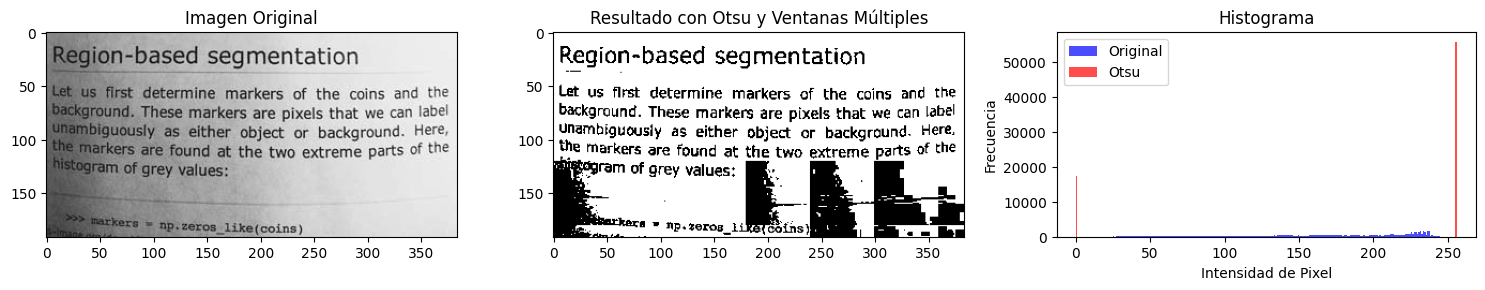

In [11]:
# Cargar la imagen de la hoja de papel
image = data.page()

# Definir tamaños de ventana para aplicar Otsu
window_sizes = [3, 7, 21, 34, 51, 55, 60]

# Aplicar Otsu para ventanas de diferentes tamaños
otsu_result_multi_window = otsu_multi_window(image, window_sizes)

# Mostrar resultados
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(otsu_result_multi_window, cmap='gray')
plt.title('Resultado con Otsu y Ventanas Múltiples')

plt.subplot(1, 3, 3)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.hist(otsu_result_multi_window.ravel(), bins=256, range=(0, 256), color='red', alpha=0.7)
plt.title('Histograma')
plt.xlabel('Intensidad de Pixel')
plt.ylabel('Frecuencia')
plt.legend(['Original', 'Otsu'])

plt.tight_layout()
plt.show()

In [12]:
def display(dict=None, nrow=None, ncol=None, xsz=15, ysz=7 ):

    fig = plt.figure(figsize=(xsz,ysz))

    # Ajusta los márgenes y el espaciado entre subplots
    # plt.subplots_adjust(#left=0.05, right=0.15,
    #                     #bottom=0.05, top=0.05,
    #                     wspace=0.01, hspace=0.01)


    for raw, col in enumerate(dict):

        plt.subplot(nrow,ncol,raw+1)
        plt.title(f'{col}')
        plt.imshow(dict[col], "gray")

### **Resultados por ventana:**

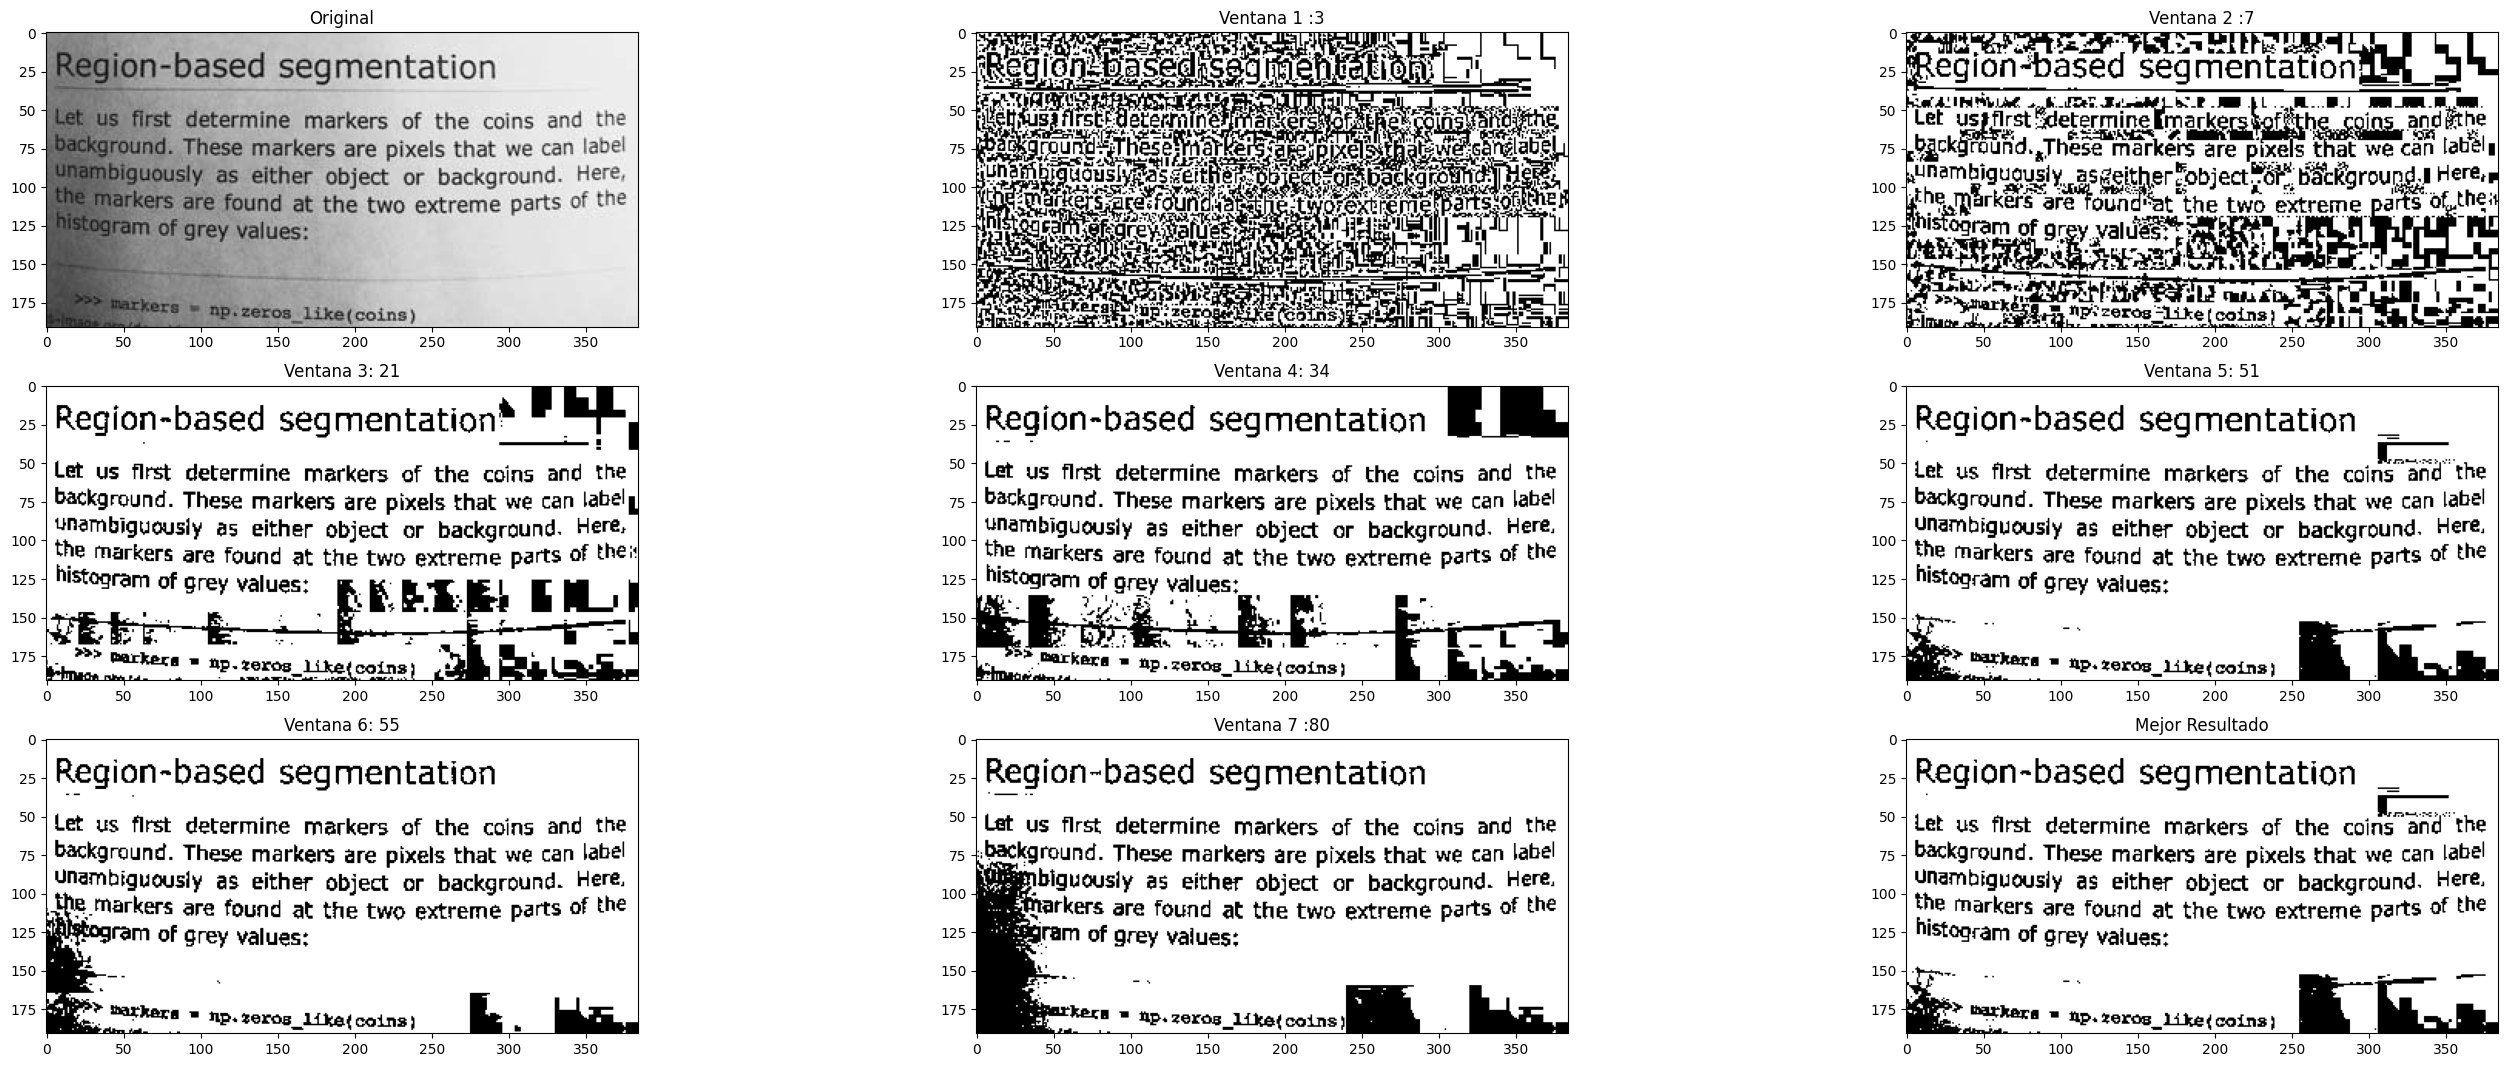

In [13]:
# Cargar la imagen de la hoja de papel
image = data.page()
#visualizar todas las ventanas

# image_1= otsu_multi_window(image, [13])
# image_2= otsu_multi_window(image, [21])
# image_3= otsu_multi_window(image, [34])
# image_4= otsu_multi_window(image, [47])
# image_5= otsu_multi_window(image, [55])
# image_6= otsu_multi_window(image, [  13, 21, 34, 47, 55 ])

image_1= otsu_multi_window(image, [3])
image_2= otsu_multi_window(image, [7])
image_3= otsu_multi_window(image, [21])
image_4= otsu_multi_window(image, [34])
image_5= otsu_multi_window(image, [51])
image_6= otsu_multi_window(image, [55])
image_7= otsu_multi_window(image, [80])
image_8= otsu_multi_window(image, [ 3, 7, 21, 34, 51, 55, 80])

image_dict = { 'Original': image
              ,'Ventana 1 :3': image_1
               ,'Ventana 2 :7': image_2
              ,'Ventana 3: 21': image_3
              ,'Ventana 4: 34': image_4
              ,'Ventana 5: 51': image_5
              ,'Ventana 6: 55': image_6
               ,'Ventana 7 :80': image_7
              ,'Mejor Resultado': image_5
              }

# Aplicar Otsu para ventanas de diferentes tamaños
display(image_dict, 3, 3, 34, 13)


**Ejemplo de uso en una Radiografía impresa**

In [14]:
def multi_tresh(image):
    thresholds = threshold_multiotsu(image)
    regions = np.digitize(image, bins=thresholds)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=255)
    ax[1].set_title('Histogram')
    for thresh in thresholds:
        ax[1].axvline(thresh, color='r')

    ax[2].imshow(regions, cmap='jet')
    ax[2].set_title('Multi-Otsu result')
    ax[2].axis('off')

    plt.subplots_adjust()

    plt.show()

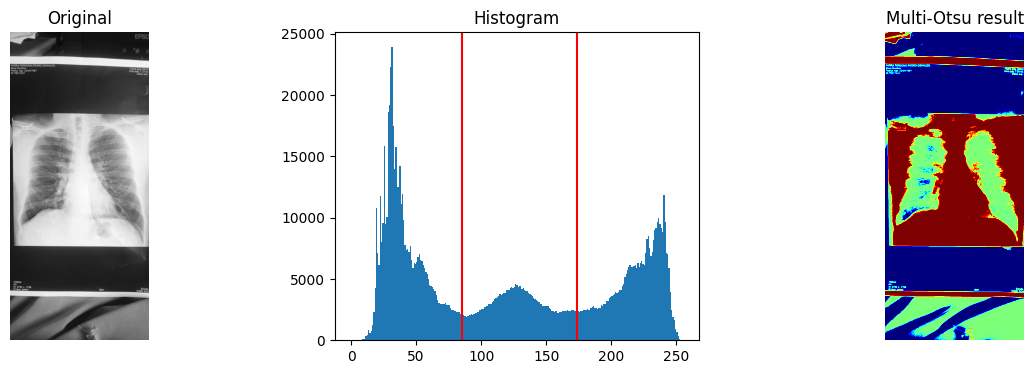

In [15]:
# Diccionario de URLs de las imágenes a procesar
image_dict_2 = {
    'Radiografía': "https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_5/Radiografia_1.jpeg?raw=true"
}

for key, url in image_dict_2.items():
    image = imagen_desde_url(url)
    if image is not None:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        multi_tresh(gray_image)
    else:
        print(f"No se pudo cargar la imagen de la URL: {url}")

In [16]:
def multipleWindowSize(image):
    """
    Muestra la imagen original junto con varias versiones de la imagen
    suavizada mediante el filtro de Gauss y segmentada usando el método de Otsu,
    junto con sus respectivos histogramas.

    Args:
        image (numpy.ndarray): La imagen de entrada en escala de grises.
    """
    wsizes = [3, 5, 11, 15, 19]

    # Crea una figura y ejes para mostrar las imágenes y los histogramas
    fig, ax = plt.subplots(nrows=2, ncols=len(wsizes)+1, figsize=(18, 6))

    # Muestra la imagen original en la primera columna de la primera fila
    ax[0, 0].imshow(image, cmap='gray')
    ax[0, 0].set_title('Original')
    ax[0, 0].axis('off')

    # Procesa la imagen con diferentes tamaños de ventana y muestra los resultados
    for i, size in enumerate(wsizes):
        gaus_img = cv2.GaussianBlur(image, (size, size), 0)
        thresholds = threshold_multiotsu(gaus_img)
        img_ots = np.digitize(gaus_img, bins=thresholds)

        # Muestra la imagen procesada y su título
        ax[0, i+1].imshow(img_ots, cmap='jet')
        ax[0, i+1].set_title(f'Otsu Window Size: {size}')
        ax[0, i+1].axis('off')

        # Muestra el histograma de la imagen procesada
        hist, bins = np.histogram(gaus_img.flatten(), bins=256)
        ax[1, i+1].hist(gaus_img.flatten(), bins=256, color='lightsteelblue')
        ax[1, i+1].set_title(f'Histogram')

        # Dibuja una línea vertical en la posición del umbral de Otsu
        for thresh in thresholds:
            ax[1, i+1].axvline(thresh, color='r')

    # Ajusta el espacio entre subgráficos
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    # Muestra la figura
    plt.show()

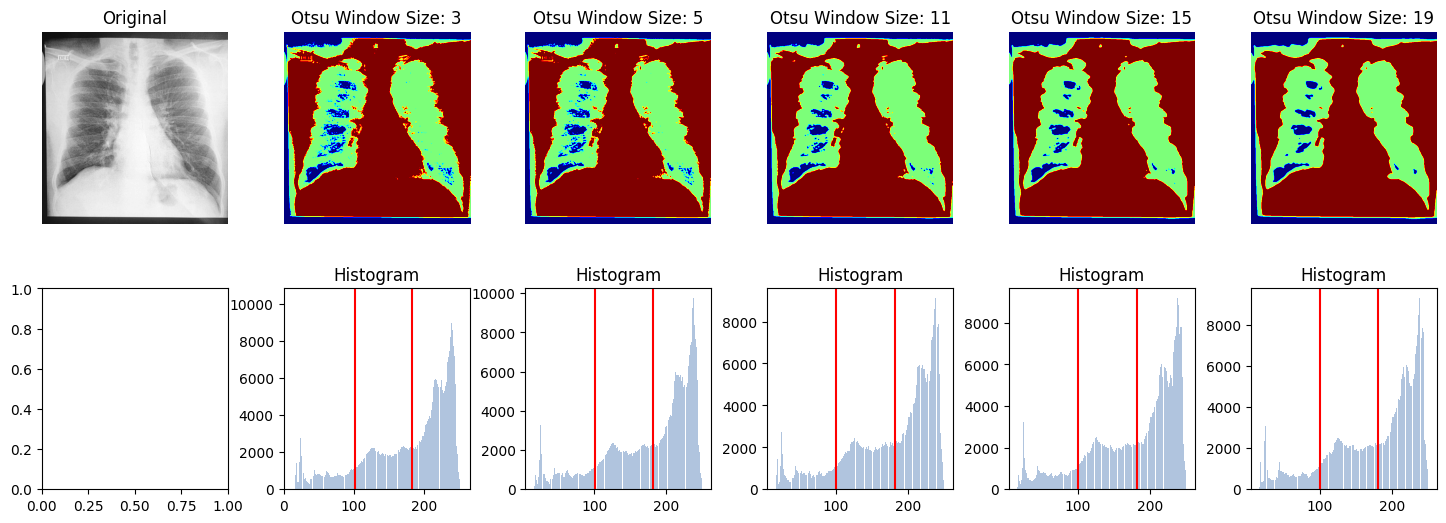

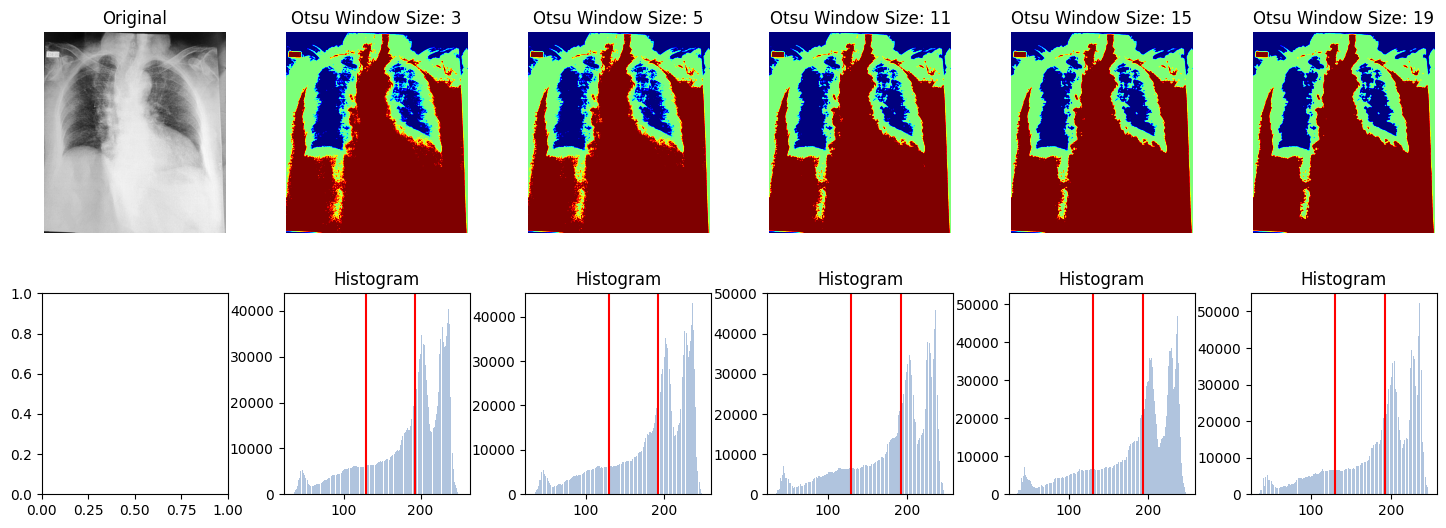

In [17]:
# Lista de URLs de las imágenes que deseas procesar
imgs_toRead = ['https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_5/Radiografia_3.jpg?raw=true', 'https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_5/Radiografia_2.jpeg?raw=true']

for img_url in imgs_toRead:
    image = imagen_desde_url(img_url)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    multipleWindowSize(gray_image)  # Convierte la imagen a escala de grises antes de pasarla a la función

## **Conclusiones**

* Eficiencia del algoritmo de Otsu: El algoritmo de Otsu ha demostrado ser altamente eficaz en la segmentación de imágenes, superando las limitaciones del enfoque de umbral simple. Su capacidad para calcular automáticamente el umbral óptimo basado en la distribución de intensidades de píxeles ha resultado en segmentaciones más precisas y consistentes en una variedad de condiciones y tipos de imágenes.

* Robustez ante variaciones: Una de las principales fortalezas del algoritmo de Otsu radica en su robustez frente a las variaciones en la iluminación y el contenido de la imagen. Al adaptarse dinámicamente a la distribución de intensidades de los píxeles, el algoritmo de Otsu es capaz de proporcionar segmentaciones confiables y consistentes en diferentes escenarios. En el caso de la hoja de impresión el algoritmo muestra cierta robustez sobre del enfoque.

* Ventajas del enfoque de ventanas múltiples: La aplicación del algoritmo de Otsu utilizando ventanas de diferentes tamaños ha resultado ser una estrategia altamente beneficiosa para mejorar la precisión de la segmentación. Al segmentar la imagen en regiones más pequeñas y aplicar el algoritmo de Otsu de manera localizada, se logra una segmentación más detallada y precisa, especialmente en imágenes con contenido variado y complejo. A su vez, se puede apreciar la variación cada una de las ventanas según sus valores asignados, en le caso de la hoja de impresión, se comienza con un valor bajo de 3 y se avanza hasta 80, en cada extremo podríamos ver que los resultados no son los adecuados sin embargo en el valor aplicado entre 50-55 se logran visualizar por completo los textos.

* Aplicaciones prácticas: Estas características hacen del algoritmo de Otsu una herramienta importante en una amplia gama de aplicaciones en visión computacional, procesamiento de imágenes y análisis de datos. Desde la segmentación de objetos en imágenes médicas hasta la detección de objetos en sistemas de visión artificial, el algoritmo de Otsu se ha establecido como una técnica fundamental para resolver una variedad de problemas de segmentación de imágenes. Al igual, como lo vimos en clase, estas técnicas no solo son valiosas en aplicaciones de procesamiento de imágenes, sino que también tienen amplias aplicaciones en diversos campos, como medicina, agricultura y seguridad, donde la segmentación precisa de imágenes es esencial para análisis y toma de decisiones.

* El método de segmentación de Otsu también se ofrece como una valiosa herramienta para dividir imágenes en escalas de grises en regiones basadas en la intensidad de los píxeles, gracias a su capacidad para seleccionar el umbral óptimo de manera eficiente. Sus resultados dependen mucho de la base de datos de imagenes de donde se obtengan, como pudimos observar tanto en la muestra de la hoja de papel como en la impresión de la radiografía se pueden encontrar resultados importantes más no óptimos como se debería.

* Aunque la umbralización simple es fácil de implementar, su efectividad se ve limitada en imágenes con iluminación irregular o presencia de ruido, lo que la hace menos adecuada para situaciones más complejas como en el caso del alebrije que aunque sus colores se realtan muy bien, tienden a mezclarse con los del fondo.

* La umbralización de Otsu múltiple representa una solución más avanzada para abordar desafíos relacionados con iluminación irregular y ruido en imágenes, aunque su implementación puede ser más complicada y demandante computacionalmente. Este uso de umbralización adaptativa demuestra cómo considerar aspectos como textura e iluminación al aplicar técnicas de segmentación, mediante el uso de diferentes tamaños de ventana para suavizar la imagen antes de aplicar el algoritmo de umbralización.

**Bibliografía**

**Tutoriales desde TEC**

- https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.htmlLinks to an external site.

- https://learnopencv.com/otsu-thresholding-with-opencv/ Links to an external site.

- https://www.geeksforgeeks.org/mahotas-otsus-method/Links to an external site.

- Gonzalez, R. & Woods, R. (2018). Digital Image Processing.  4° Edition Pearson. Capítulo 10. Págs. 669-772

